<a href="https://colab.research.google.com/github/drianc/TCC-PUC-MINAS/blob/main/TCC_PUC_MINAS_HEMOVIGILANCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning

##Preparação da Base para Analise Machine Learning

#Coleta de Dados

In [363]:
#Bibliotecas 
import pandas as pd
import numpy as np

#bibliotecas para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt



In [364]:

#Configuração da apresentação do dataframe
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.precision',4)
pd.set_option('display.expand_frame_repr',False)

In [28]:
#Os dados de Notificações em Hemovigilância é um projeto de Inteligência de Dados que extrai os dados do sistema Notivisa de notificações de eventos adversos relacionados ao ciclo do sangue com objetivo de melhorar a qualidade de produtos (sangue e hemocomponentes) e dos processos, bem como aumentar a segurança do doador e receptor. Evento adverso do ciclo do sangue é toda ocorrência adversa associada às etapas do ciclo do sangue que possa resultar em risco para a saúde do doador ou do receptor, tendo ou não como consequência uma reação adversa.
#O Objetivo é dar transparência e apresentar os dados provenientes das notificações realizadas. 
#A legislação vigente estabelece a obrigatoriedade de notificar a ocorrência de reações adversas, quase-erros graves 
#e incidentes graves relacionados ao uso terapêutico de sangue e hemoderivados ao 
#Sistema Nacional de Vigilância Sanitária por meio do Notivisa.
#Fonte: dados.gov.br
      
df_hemovigilancia = pd.read_csv('DADOS_ABERTOS_HEMOVIGILANCIA.csv',sep=';',encoding = 'ISO-8859-1')
df_hemovigilancia.head()

,NU_NOTIFICACAO,DATA_OCORRENCIA_EVENTO,DATA_NOTIFICACAO_EVENTO,STATUS_ANALISE,PRODUTO_MOTIVO,TIPO_REACAO_TRANSFUSIONAL,GRAU_RISCO,CATEGORIA_NOTIFICADOR,TIPO_HEMOCOMPONENTE,FAIXA_ETARIA_PACIENTE,CIDADE_NOTIFICACAO,UF_NOTIFICACAO,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,ETAPA_CICLO_SANGUE,DS_ESPECIFICACAO_EVENTO
0,200612000141,06/20/2006 00:00:00,12/22/2006 00:00:00,Concluída,Uso de sangue ou componente,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,FLORIANÓPOLIS,SC,IMEDIATA,Reação transfusional,Não informado,Não informado
1,200612000144,06/14/2006 00:00:00,12/22/2006 00:00:00,Concluída,Uso de sangue ou componente,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,PLASMA FRESCO CONGELADO,DE 30 A 39 ANOS,FLORIANÓPOLIS,SC,IMEDIATA,Reação transfusional,Não informado,Não informado
2,200612000146,04/24/2006 00:00:00,12/22/2006 00:00:00,Concluída,Uso de sangue ou componente,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,FLORIANÓPOLIS,SC,IMEDIATA,Reação transfusional,Não informado,Não informado
3,200612000152,07/18/2006 00:00:00,12/22/2006 00:00:00,Concluída,Uso de sangue ou componente,Outras reações imediatas (OI),Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,FLORIANÓPOLIS,SC,IMEDIATA,Reação transfusional,Não informado,Não informado
4,200612000154,08/16/2006 00:00:00,12/22/2006 00:00:00,Concluída,Uso de sangue ou componente,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,FLORIANÓPOLIS,SC,IMEDIATA,Reação transfusional,Não informado,Não informado


In [451]:
df_hemo_analise = df_hemovigilancia.drop(columns=['DATA_OCORRENCIA_EVENTO', 'DATA_NOTIFICACAO_EVENTO', 'STATUS_ANALISE', 'PRODUTO_MOTIVO', 'CATEGORIA_NOTIFICADOR', 'TIPO_HEMOCOMPONENTE','CIDADE_NOTIFICACAO', 'UF_NOTIFICACAO', 'ETAPA_CICLO_SANGUE'])

In [452]:
df_hemo_analise.columns

Index(['NU_NOTIFICACAO', 'TIPO_REACAO_TRANSFUSIONAL', 'GRAU_RISCO', 'FAIXA_ETARIA_PACIENTE', 'DS_TEMPORALIDADE_REACAO', 'TIPO_EVENTO_ADVERSO', 'DS_ESPECIFICACAO_EVENTO'], dtype='object')

In [453]:
df_hemo_analise.head()

,NU_NOTIFICACAO,TIPO_REACAO_TRANSFUSIONAL,GRAU_RISCO,FAIXA_ETARIA_PACIENTE,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,DS_ESPECIFICACAO_EVENTO
0,200612000141,Reação alérgica (ALG),Grau I - Leve,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
1,200612000144,Reação alérgica (ALG),Grau I - Leve,DE 30 A 39 ANOS,IMEDIATA,Reação transfusional,Não informado
2,200612000146,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
3,200612000152,Outras reações imediatas (OI),Grau III - Grave,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado
4,200612000154,Reação febril não hemolítica (RFNH),Grau I - Leve,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado


In [454]:
df_hemo_analise.tail()

,NU_NOTIFICACAO,TIPO_REACAO_TRANSFUSIONAL,GRAU_RISCO,FAIXA_ETARIA_PACIENTE,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,DS_ESPECIFICACAO_EVENTO
148917,202109001373,Reação alérgica (ALG),Grau I - Leve,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
148918,202109001374,Reação alérgica (ALG),Grau I - Leve,DE 10 A 19 ANOS,IMEDIATA,Reação transfusional,Não informado
148919,202109001376,Reação alérgica (ALG),Grau I - Leve,DE 20 A 29 ANOS,IMEDIATA,Reação transfusional,Não informado
148920,202109001380,Reação alérgica (ALG),Grau I - Leve,DE 40 A 49 ANOS,IMEDIATA,Reação transfusional,Não informado
148921,202109001382,Reação alérgica (ALG),Grau I - Leve,DE 10 A 19 ANOS,IMEDIATA,Reação transfusional,Não informado


In [455]:
df_hemo_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148922 entries, 0 to 148921
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   NU_NOTIFICACAO             148922 non-null  int64 
 1   TIPO_REACAO_TRANSFUSIONAL  146955 non-null  object
 2   GRAU_RISCO                 148922 non-null  object
 3   FAIXA_ETARIA_PACIENTE      148922 non-null  object
 4   DS_TEMPORALIDADE_REACAO    148922 non-null  object
 5   TIPO_EVENTO_ADVERSO        148922 non-null  object
 6   DS_ESPECIFICACAO_EVENTO    148922 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.0+ MB


In [456]:
df_hemo_analise.count()

NU_NOTIFICACAO               148922
TIPO_REACAO_TRANSFUSIONAL    146955
GRAU_RISCO                   148922
FAIXA_ETARIA_PACIENTE        148922
DS_TEMPORALIDADE_REACAO      148922
TIPO_EVENTO_ADVERSO          148922
DS_ESPECIFICACAO_EVENTO      148922
dtype: int64

In [457]:
df_hemo_analise.isnull().sum()

NU_NOTIFICACAO                  0
TIPO_REACAO_TRANSFUSIONAL    1967
GRAU_RISCO                      0
FAIXA_ETARIA_PACIENTE           0
DS_TEMPORALIDADE_REACAO         0
TIPO_EVENTO_ADVERSO             0
DS_ESPECIFICACAO_EVENTO         0
dtype: int64

In [458]:
#dados não informados (NaN) sobre o tipo de reação transfusional, será acrecentando nos valores nulos a expressão : 'Não informado'
df_hemo_analise.fillna('Não informado',inplace=True)

In [459]:
df_hemo_analise.head()

,NU_NOTIFICACAO,TIPO_REACAO_TRANSFUSIONAL,GRAU_RISCO,FAIXA_ETARIA_PACIENTE,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,DS_ESPECIFICACAO_EVENTO
0,200612000141,Reação alérgica (ALG),Grau I - Leve,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
1,200612000144,Reação alérgica (ALG),Grau I - Leve,DE 30 A 39 ANOS,IMEDIATA,Reação transfusional,Não informado
2,200612000146,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
3,200612000152,Outras reações imediatas (OI),Grau III - Grave,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado
4,200612000154,Reação febril não hemolítica (RFNH),Grau I - Leve,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado


In [460]:
np.unique(df_hemo_analise['GRAU_RISCO'])

array(['Grau I   - Leve', 'Grau II  - Moderado', 'Grau III - Grave',
       'Grau IV  - Óbito', 'Não informado'], dtype=object)

In [461]:
#serão excluídos os registro que estão como não informado no campo GRAU_RISCO, pois o mesmo fará parte da minha Classe, 
#os demais campos serão meus previsores
df_hemo_analise_trat = df_hemo_analise.drop(df_hemo_analise[df_hemo_analise['GRAU_RISCO'] =='Não informado'].index)


In [462]:
np.unique(df_hemo_analise_trat['GRAU_RISCO'])

array(['Grau I   - Leve', 'Grau II  - Moderado', 'Grau III - Grave',
       'Grau IV  - Óbito'], dtype=object)

In [463]:
df_hemo_analise_trat.isnull().sum()

NU_NOTIFICACAO               0
TIPO_REACAO_TRANSFUSIONAL    0
GRAU_RISCO                   0
FAIXA_ETARIA_PACIENTE        0
DS_TEMPORALIDADE_REACAO      0
TIPO_EVENTO_ADVERSO          0
DS_ESPECIFICACAO_EVENTO      0
dtype: int64

In [464]:
df_hemo_analise_trat.count()

NU_NOTIFICACAO               146927
TIPO_REACAO_TRANSFUSIONAL    146927
GRAU_RISCO                   146927
FAIXA_ETARIA_PACIENTE        146927
DS_TEMPORALIDADE_REACAO      146927
TIPO_EVENTO_ADVERSO          146927
DS_ESPECIFICACAO_EVENTO      146927
dtype: int64

In [465]:
df_hemo_analise_trat.head()

,NU_NOTIFICACAO,TIPO_REACAO_TRANSFUSIONAL,GRAU_RISCO,FAIXA_ETARIA_PACIENTE,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,DS_ESPECIFICACAO_EVENTO
0,200612000141,Reação alérgica (ALG),Grau I - Leve,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
1,200612000144,Reação alérgica (ALG),Grau I - Leve,DE 30 A 39 ANOS,IMEDIATA,Reação transfusional,Não informado
2,200612000146,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado
3,200612000152,Outras reações imediatas (OI),Grau III - Grave,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado
4,200612000154,Reação febril não hemolítica (RFNH),Grau I - Leve,MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado


In [466]:
#Alterar a posição do campo no dataframe
df_hemo_analise_trat = df_hemo_analise_trat[['TIPO_REACAO_TRANSFUSIONAL',	'FAIXA_ETARIA_PACIENTE',	'DS_TEMPORALIDADE_REACAO',	'TIPO_EVENTO_ADVERSO',	'DS_ESPECIFICACAO_EVENTO','GRAU_RISCO']]

In [467]:
df_hemo_analise_trat.head()

,TIPO_REACAO_TRANSFUSIONAL,FAIXA_ETARIA_PACIENTE,DS_TEMPORALIDADE_REACAO,TIPO_EVENTO_ADVERSO,DS_ESPECIFICACAO_EVENTO,GRAU_RISCO
0,Reação alérgica (ALG),DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado,Grau I - Leve
1,Reação alérgica (ALG),DE 30 A 39 ANOS,IMEDIATA,Reação transfusional,Não informado,Grau I - Leve
2,Sobrecarga circulatória associada à transfusão...,DE 60 A 69 ANOS,IMEDIATA,Reação transfusional,Não informado,Grau III - Grave
3,Outras reações imediatas (OI),MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado,Grau III - Grave
4,Reação febril não hemolítica (RFNH),MAIOR DE 70 ANOS,IMEDIATA,Reação transfusional,Não informado,Grau I - Leve


#Criação das variáveis Provisores e Classe

In [468]:
df_hemo_analise_trat.columns

Index(['TIPO_REACAO_TRANSFUSIONAL', 'FAIXA_ETARIA_PACIENTE', 'DS_TEMPORALIDADE_REACAO', 'TIPO_EVENTO_ADVERSO', 'DS_ESPECIFICACAO_EVENTO', 'GRAU_RISCO'], dtype='object')

In [469]:
df_hemo_analise_trat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146927 entries, 0 to 148921
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   TIPO_REACAO_TRANSFUSIONAL  146927 non-null  object
 1   FAIXA_ETARIA_PACIENTE      146927 non-null  object
 2   DS_TEMPORALIDADE_REACAO    146927 non-null  object
 3   TIPO_EVENTO_ADVERSO        146927 non-null  object
 4   DS_ESPECIFICACAO_EVENTO    146927 non-null  object
 5   GRAU_RISCO                 146927 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [470]:
##Escalonamento dos valores
## tratar atributos categóricos , transformando string para número

from sklearn.preprocessing import LabelEncoder

In [471]:
#variáveis provisor
X_hemo= df_hemo_analise_trat.iloc[:,0:5].values
#variáveis classe
y_hemo= df_hemo_analise_trat.iloc[:,5].values

In [472]:
X_hemo[:,0]

array(['Reação alérgica (ALG)', 'Reação alérgica (ALG)',
       'Sobrecarga circulatória associada à transfusão (SC/TACO)', ...,
       'Reação alérgica (ALG)', 'Reação alérgica (ALG)',
       'Reação alérgica (ALG)'], dtype=object)

In [473]:
y_hemo

array(['Grau I   - Leve', 'Grau I   - Leve', 'Grau III - Grave', ...,
       'Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve'],
      dtype=object)

In [388]:
type(Y_hemo)

numpy.ndarray

In [474]:
label_encoder_TIPO_REACAO_TRANSFUSIONAL = LabelEncoder()
label_encoder_FAIXA_ETARIA_PACIENTE = LabelEncoder()
label_encoder_DS_TEMPORALIDADE_REACAO = LabelEncoder()
label_encoder_TIPO_EVENTO_ADVERSO = LabelEncoder()
label_encoder_DS_ESPECIFICACAO_EVENTO = LabelEncoder()

X_hemo[:,0]= label_encoder_TIPO_REACAO_TRANSFUSIONAL.fit_transform(X_hemo[:,0])
X_hemo[:,1]= label_encoder_FAIXA_ETARIA_PACIENTE.fit_transform(X_hemo[:,1])
X_hemo[:,2]= label_encoder_DS_TEMPORALIDADE_REACAO.fit_transform(X_hemo[:,2])
X_hemo[:,3]= label_encoder_TIPO_EVENTO_ADVERSO.fit_transform(X_hemo[:,3])
X_hemo[:,4]= label_encoder_DS_ESPECIFICACAO_EVENTO.fit_transform(X_hemo[:,4])


In [475]:
X_hemo

array([[11, 8, 0, 0, 0],
       [11, 4, 0, 0, 0],
       [18, 8, 0, 0, 0],
       ...,
       [11, 3, 0, 0, 0],
       [11, 5, 0, 0, 0],
       [11, 2, 0, 0, 0]], dtype=object)

In [476]:
#O One Hot Enconding irá gerar vetores binários para cada valor inteiro.
#o objetivo é não premitir que os valores gerados no LabelEncoder tenham pesos diferentes para váriáveis que não possue ordenação 
#Ou ainda, o algoritmo poderia calcular a média desses valores de alguma forma e dar pesos específicos para essa feature.
#Esses valores podem prejudicar a eficiência do algoritmo, haja visto, que estes números não significam nada, apenas foram codificados para representar valores categóricos.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [477]:
onehotencoder_hemo = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[0,1,2,3,4])],remainder='passthrough')
X_hemo = onehotencoder_hemo.fit_transform(X_hemo).toarray()

In [393]:
X_hemo.shape

(146927, 35)

In [478]:
#Divisão em base de Treinamento e Teste

from sklearn.model_selection import train_test_split

In [479]:
#Criar variáveis
X_hemo_treinamento, X_hemo_teste, y_hemo_treinamento, y_hemo_teste = train_test_split(X_hemo,y_hemo,test_size=0.25,random_state = 0)


In [480]:
X_hemo_treinamento.shape, y_hemo_treinamento.shape

((110195, 35), (110195,))

In [481]:
X_hemo_teste.shape, y_hemo_teste.shape

((36732, 35), (36732,))

In [309]:
#salvando as várias para reutilização
import pickle

In [311]:
with open('hemo.pkl', mode = 'wb') as f:
  pickle.dump([X_hemo_treinamento,y_hemo_treinamento,X_hemo_teste,y_hemo_teste],f)

In [313]:
from sklearn.naive_bayes import GaussianNB

In [314]:
#Executando processamento dos algoritmos
naive_hemo = GaussianNB()
naive_hemo.fit(X_hemo_treinamento, y_hemo_treinamento)
previsoes = naive_hemo.predict(X_hemo_teste)
previsoes

array(['Grau IV  - Óbito', 'Grau I   - Leve', 'Grau I   - Leve', ...,
       'Grau I   - Leve', 'Grau I   - Leve', 'Grau IV  - Óbito'],
      dtype='<U19')

In [315]:
y_hemo_teste

array(['Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve', ...,
       'Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve'],
      dtype=object)

In [332]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [317]:
accuracy_score(y_hemo_teste, previsoes)

0.45875530872263964

In [318]:
confusion_matrix(y_hemo_teste,previsoes)

array([[16436,     1, 11731,  2435],
       [ 1692,     0,  2077,  1237],
       [   91,     0,   352,   603],
       [    4,     0,    10,    63]])

In [330]:
#gera uma matrix mas amigável
from yellowbrick.classifier import ConfusionMatrix


0.45875530872263964

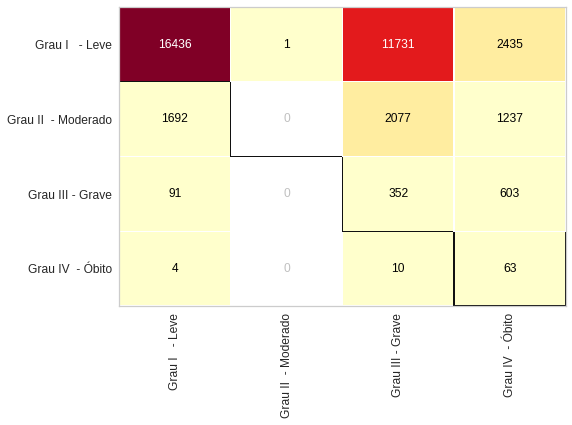

In [331]:
cm= ConfusionMatrix(naive_hemo)
cm.fit(X_hemo_treinamento,y_hemo_treinamento)
cm.score(X_hemo_teste, y_hemo_teste)

In [333]:
print(classification_report(y_hemo_teste,previsoes))

                     precision    recall  f1-score   support

    Grau I   - Leve       0.90      0.54      0.67     30603
Grau II  - Moderado       0.00      0.00      0.00      5006
   Grau III - Grave       0.02      0.34      0.05      1046
   Grau IV  - Óbito       0.01      0.82      0.03        77

           accuracy                           0.46     36732
          macro avg       0.24      0.42      0.19     36732
       weighted avg       0.75      0.46      0.56     36732



In [482]:
from sklearn.tree import DecisionTreeClassifier

In [483]:
arvore_hemo = DecisionTreeClassifier(criterion='entropy')
arvore_hemo.fit(X_hemo_treinamento,y_hemo_treinamento)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [484]:
from sklearn import tree

In [485]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_hemo_teste, previsoes)

0.8372536208210825

In [486]:
print(classification_report(y_hemo_teste,previsoes))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

    Grau I   - Leve       0.84      0.99      0.91     30603
Grau II  - Moderado       0.39      0.02      0.05      5006
   Grau III - Grave       0.51      0.20      0.29      1046
   Grau IV  - Óbito       0.00      0.00      0.00        77

           accuracy                           0.84     36732
          macro avg       0.44      0.31      0.31     36732
       weighted avg       0.77      0.84      0.78     36732



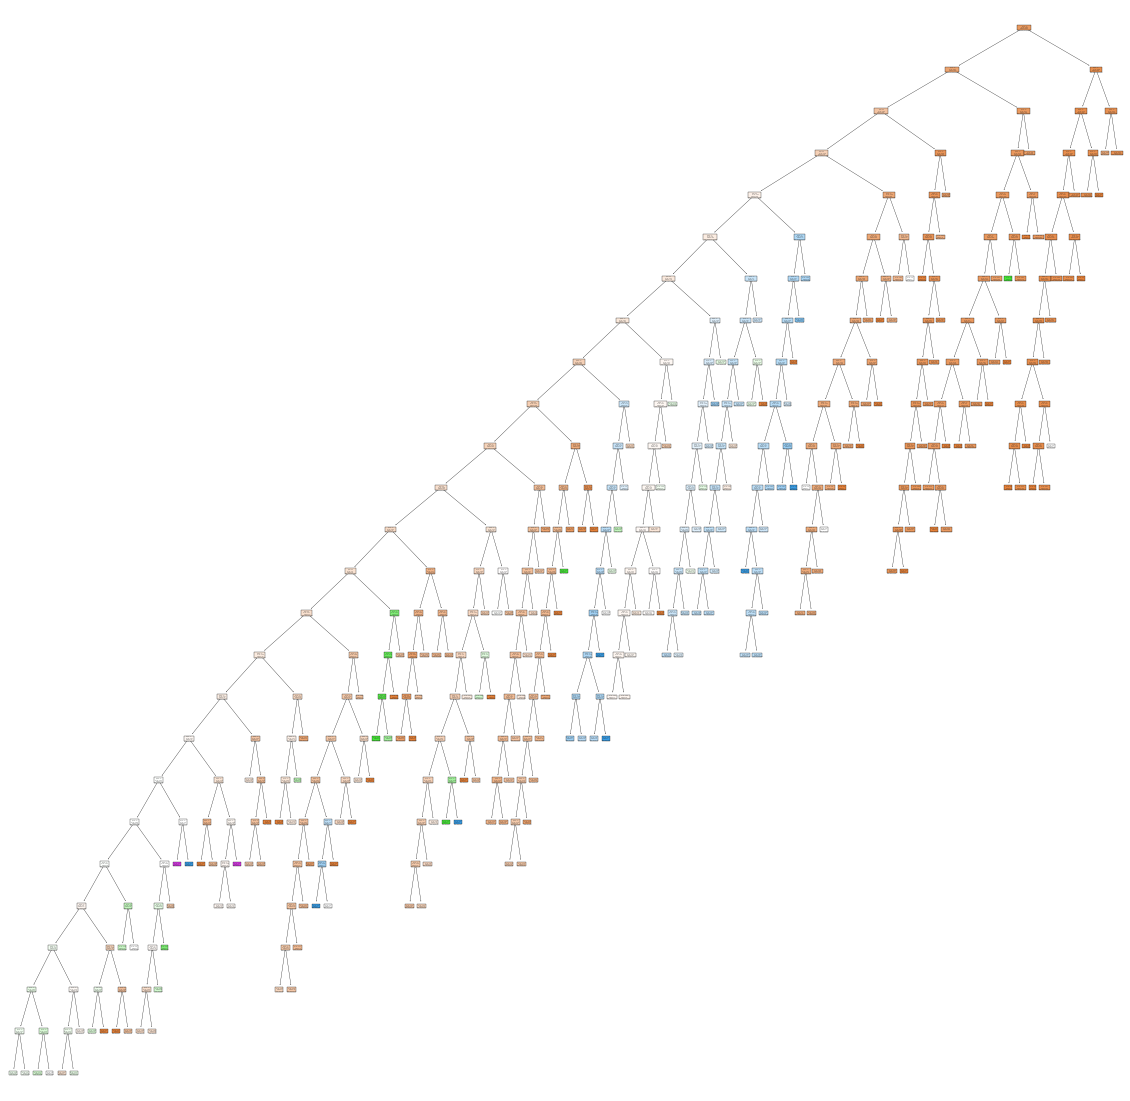

In [487]:
figura, eixos = plt.subplots(nrows=1 ,ncols=1, figsize=([20,20]))
tree.plot_tree(arvore_hemo,filled=True);
figura.savefig('arvore.png')


In [399]:
from sklearn.ensemble import RandomForestClassifier

In [442]:
#randomForest
randomForest_hemo= RandomForestClassifier(n_estimators=4,criterion='entropy', random_state=0)
randomForest_hemo.fit(X_hemo_treinamento,y_hemo_treinamento)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [443]:
previsoes = randomForest_hemo.predict(X_hemo_teste)
previsoes

array(['Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve', ...,
       'Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve'],
      dtype=object)

In [444]:
y_hemo_teste

array(['Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve', ...,
       'Grau I   - Leve', 'Grau I   - Leve', 'Grau I   - Leve'],
      dtype=object)

In [445]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [446]:
accuracy_score(y_hemo_teste, previsoes)

0.8372536208210825

In [448]:
confusion_matrix(y_hemo_teste,previsoes)

array([[30420,   115,    68,     0],
       [ 4775,   120,   111,     0],
       [  766,    66,   214,     0],
       [   44,     4,    29,     0]])

In [449]:
#gera uma matrix mas amigável
from yellowbrick.classifier import ConfusionMatrix

0.8372536208210825

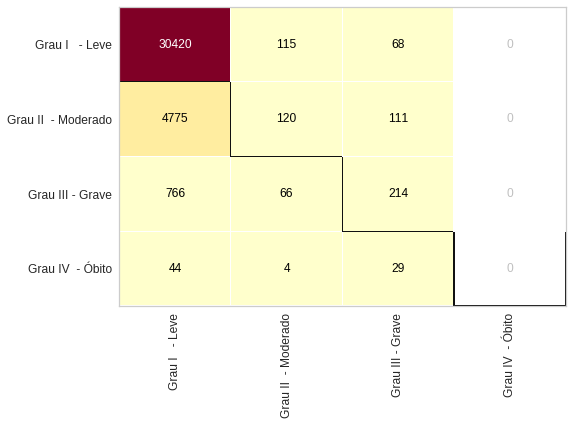

In [450]:
cm= ConfusionMatrix(randomForest_hemo)
cm.fit(X_hemo_treinamento,y_hemo_treinamento)
cm.score(X_hemo_teste, y_hemo_teste)

In [427]:
print(classification_report(y_hemo_teste,previsoes))

                     precision    recall  f1-score   support

    Grau I   - Leve       0.84      1.00      0.91     30603
Grau II  - Moderado       0.36      0.01      0.03      5006
   Grau III - Grave       0.51      0.20      0.29      1046
   Grau IV  - Óbito       0.00      0.00      0.00        77

           accuracy                           0.84     36732
          macro avg       0.43      0.30      0.31     36732
       weighted avg       0.77      0.84      0.77     36732

